In [9]:
import json
from pprint import pprint
import sys
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from numpy import arctan, pi, log, exp
%matplotlib inline

def poly(x, a, b):
    return a * np.power(x, b)

def plot_results(filename):

    with open(filename) as data_file:
        res = json.load(data_file)
    
    nn_avg= [elt['res']['nn avg'] for elt in res]
    nn_std= [elt['res']['nn std'] for elt in res]
    lu_avg= [elt['res']['lu avg'] for elt in res]
    lu_std= [elt['res']['lu std'] for elt in res]
    upper= [elt['data']['fault scale'] for elt in res]
    p= [elt['res']['p'] for elt in res]
    p, lu_avg, lu_std, nn_avg, upper\
        = zip(*sorted(zip(p, lu_avg, lu_std, nn_avg, upper)))

    fig = figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    ax.set_yscale('log')
    ax.set_xscale('log')

    # Pick some colors
    lightnavy = matplotlib.colors.colorConverter.to_rgb('#0174DF') 
    darknavy = matplotlib.colors.colorConverter.to_rgb('#084B8A')
    lightred = matplotlib.colors.colorConverter.to_rgb('#F7819F') 
    darkred = matplotlib.colors.colorConverter.to_rgb('#DF013A')
    verydarkred = matplotlib.colors.colorConverter.to_rgb('#B40431') 
 
    ax.errorbar(p, lu_avg, yerr=lu_std, \
        linestyle= 'None', color= darkred, markersize=8, capsize=3)
    ax.plot(p, lu_avg, \
        linestyle= 'None', marker= 'o', color= verydarkred, markersize= 3, \
        label= 'Look up table')
    # ax.errorbar(p, nn_avg, yerr=nn_std, \
    #   linestyle= 'None', color= darknavy, markersize=8, capsize=3)
    plt.plot(p, nn_avg, \
        marker='o', linestyle = 'None', color= darknavy, markersize=3, \
        label= 'Neural decoder')

    ax.yaxis.grid(True, linestyle='-', which='major', color='grey')
    ax.yaxis.grid(True, linestyle='-', which='minor', color='lightgrey')
    ax.xaxis.grid(True, linestyle='-', which='major', color='grey')
    ax.xaxis.grid(True, linestyle='-', which='minor', color='lightgrey')

    lu_poly, _ = curve_fit(poly, p, lu_avg)
    nn_poly, _ = curve_fit(poly, p, nn_avg)

    plt.plot(p, poly(p, *lu_poly), linestyle= '--', color= lightred)
    plt.plot(p, poly(p, *nn_poly), linestyle= '--', color= lightnavy)
    plt.plot(p, p, linestyle= '--', color= 'black', linewidth= 1)
#     plt.plot(p, upper, linestyle= '--', color= 'grey')

    ymin, ymax= ax.get_ylim()
    xmin, xmax= ax.get_xlim()
    plot_slope= log(ymax/ymin)/log(xmax/xmin)

    ax.text(p[0], poly(p[0], *lu_poly), \
        "$%f x^{%f}$" % (lu_poly[0], lu_poly[1]), va= 'bottom', \
        fontsize=9, rotation= 180/ (pi * plot_slope) * arctan(lu_poly[1]))
#     ax.text(p[0], poly(p[0], *nn_poly), \
#         "$%f x^{%f}$" % (nn_poly[0], nn_poly[1]), va= 'bottom', \
#         fontsize=9, rotation= 180/ (pi * plot_slope) * arctan(nn_poly[1]))

    ax.set_xlabel('Noise model (p)')
    ax.set_ylabel('Fault rate')
    ax.set_title('Fault rate comparison')
    plt.legend()
    plt.savefig(filename+'.pdf')
    plt.show()

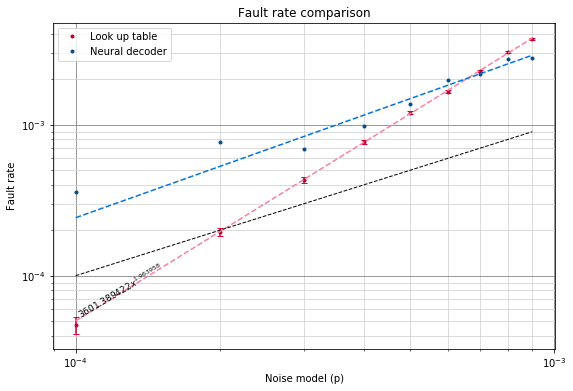

In [10]:
plot_results('CNOTLab/'+ '2017-11-12-18-09-51.json')